## Supplementary notebook for Size matters: An analytical study of the role of tissue size in spatiotemporal distribution of morphogens unveils a transition between different Reaction-Diffusion regimes.
### Alberto S. Ceccarelli 1 , Augusto Borges 1, 2, 3 & Osvaldo Chara 1,4
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig 6 from the paper.
#### Run the following cell to plot fig 6 from the paper and to save it as a png image.
##### Expected computational time: 5 seconds.

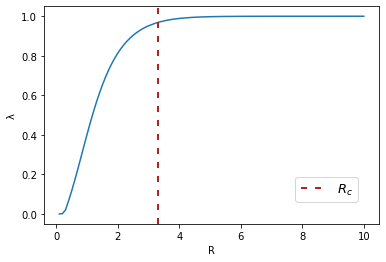

In [2]:
# Import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define functions
# This function calculates the morphogen concentration in a finite tissue at the steady state using the analytic 
# solution.
def ss_finite(x):
    return (np.exp(-x/characteristic)/(1+np.exp(-2*L/characteristic))-np.exp(x/characteristic)/(1+np.exp(2*L/characteristic)))

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution.
def ss_infinite(x,characteristic):
    return np.exp(-x/characteristic)

# Define parameters
characteristic = 1
lengths=np.arange(0.1,10.1,0.1)
lambdas=[]
# Loop over diferent tissue sizes
for length in lengths:
    L=length

#     Simulate data using the finite model
    x = np.arange(0,L+L/100,L/100)
    y = ss_finite(x)

#     Calculates the characteristic length from the fit of the infinite solution
    params = curve_fit(ss_infinite, x, y)
    [a] = params[0]
    lambdas.append(a)
    

# Plot the results
plt.plot(lengths, lambdas)
plt.axvline(x=3.3, color="firebrick", ls="--", dashes=(3, 4), label="$R_{c}$",linewidth=2.0)
plt.xlabel('R')
plt.ylabel('λ')
plt.legend(loc=(0.75,0.1),prop={'size': 13})
plt.savefig("fig6.png",dpi=300)
plt.show()
plt.close()